In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from matplotlib import gridspec
import json
import matplotlib
from os import listdir
from os.path import isfile, join

import L4model_extraction_copy as getL4
import analysis_test

import cobra_analysis

# %matplotlib notebook
import matplotlib.pyplot as plt
import pickle

In [2]:
#define the inputs for the first stimulus
#options: 
#system is the mouse, {ll1, ll2, ll3}
#stim_type is {gratings, flashes, bars, spont, natural_images,natural_movies}, not all mice
#have all stimuli. Look in the stimulation_table.pdf file in L4Spikes directory
#stim_id is the name of the stim
#trial id is obvious, usually 0 to 9

include_recurrent=1
system1='ll1'
stim_type1='gratings'
stim_id1= 'g9'
trial_id1= [0,1,2,3,4]

#define the inputs for the second stimulus
system2 = system1
stim_type2 = stim_type1
stim_id2= 'g8'
trial_id2= [0,1,2,3,4]


#define random subset of cells, up to 9999. If you want all cells, run 'all'.
ncells=100
subset_cell_ids = np.random.permutation(10000)[0:ncells]


#get the spiketimes and indices
spiketimes1, indices1,spiketimes1_all = getL4.send_output(system1,
                                          stim_type1,
                                          stim_id1,
                                          trial_id1,
                                          subset_cell_ids,
                                          include_recurrent)

spiketimes2, indices2,spiketimes2_all= getL4.send_output(system2,
                                          stim_type2,
                                          stim_id2,
                                          trial_id2,               
                                          subset_cell_ids,
                                          include_recurrent)

#get the index of all cells that fired at least one spike
stim1_firing_cells=np.unique(indices1) 
stim2_firing_cells=np.unique(indices2)

L4model_extraction_copy.py:137: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if subset_cell_ids == 'all':


24.432
33.536


There are cells that don't fire, and this will mess up my index matching, so find the subset 
of randomly selected cells that have non-zero firing rate across all stimuli of interest
Now get the intersection of the cells that fire for both stimuli, and we'll run the analysis on only this subset.

In [4]:
#find the cells that fire under both stimuli
both_stims_firing_cells= np.intersect1d(stim1_firing_cells, stim2_firing_cells)

#now go back through each stim set and only look at these indices
#make sure this looks like above

spiketimes1, indices1,spiketimes1_all= getL4.send_output(system1,
                                          stim_type1,
                                          stim_id1,
                                          trial_id1,               
                                          both_stims_firing_cells,
                                          include_recurrent)

spiketimes2, indices2,spiketimes2_all= getL4.send_output(system2,
                                          stim_type2,
                                          stim_id2,
                                          trial_id2,               
                                          both_stims_firing_cells,
                                          include_recurrent)




26.5565217391
36.3304347826


In [5]:
#check that we have the same number of cells in each stimulus set-so the pop corrs for each
#condition matche up cell to cell
print len(both_stims_firing_cells)
print len(np.unique(indices1))
print len(np.unique(indices2))

23
23
23


In [7]:
#Currently, the population corr analysis module requires continuous cell indices, so here we
#change the index to make it continuous. This doesn't change anything important.

indices_cont1=np.zeros_like(indices1,dtype=int)
for i_f,index in enumerate(np.unique(indices1)):
        indices_cont1[indices1==index]=i_f
        
#do it for the second stim
indices_cont2=np.zeros_like(indices2,dtype=int)
for i_f,index in enumerate(np.unique(indices2)):
        indices_cont2[indices2==index]=i_f


Now  plot the scatter for before and after the change in index, to make sure it works.

/Users/madsarv/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


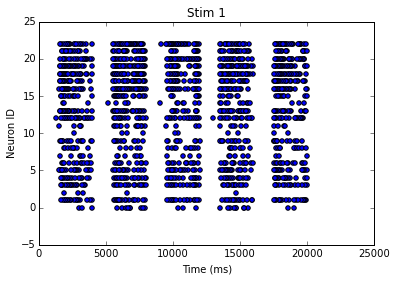

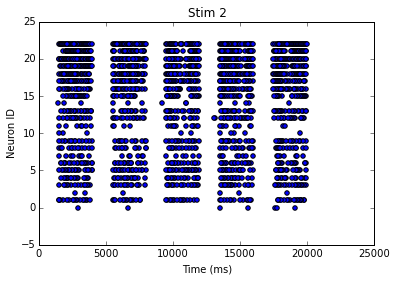

In [8]:
fig, axs = plt.subplots(1)
plt.scatter(spiketimes1, indices_cont1)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron ID')
plt.title('Stim 1')

fig, axs = plt.subplots(1)
plt.scatter(spiketimes2, indices_cont2)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron ID')
plt.title('Stim 2')

20000
23
20000
23
20000
23
20000
23
20000
23
20000
23
20000
23
20000
23
20000
23
20000
23


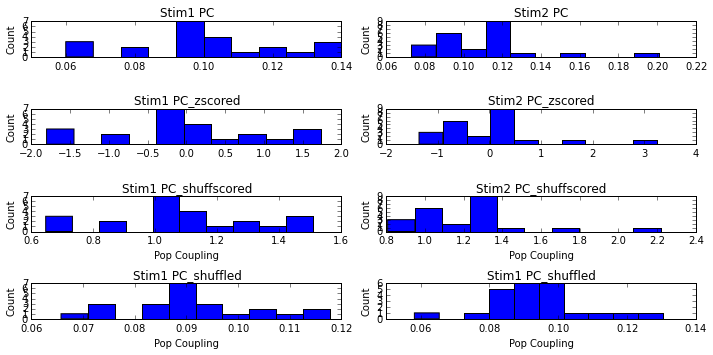

In [9]:
#now run the analysis on spikes


#stim 1
pc_shuffle_scored_stim1 = cobra_analysis.pop_corr_spikes_shuffle_scored(spiketimes1,indices_cont1, len(np.unique(indices_cont1)),t_start=0, t_end=20000)
pc_stim1 = cobra_analysis.pop_corr_spikes(spiketimes1, indices_cont1, len(np.unique(indices_cont1)), t_start=0, t_end=20000)
pc_zscored_stim1 = cobra_analysis.pop_corr_spikes_z_scored(spiketimes1, indices_cont1, len(np.unique(indices_cont1)), t_start=0, t_end=20000)
pc_shuffled_stim1 = cobra_analysis.pop_corr_spikes_shuffled(spiketimes1,indices_cont1, len(np.unique(indices_cont1)),t_start=0, t_end=20000)


#stim 2
pc_shuffle_scored_stim2 = cobra_analysis.pop_corr_spikes_shuffle_scored(spiketimes2,indices_cont2, len(np.unique(indices_cont2)),t_start=0, t_end=20000)
pc_stim2 = cobra_analysis.pop_corr_spikes(spiketimes2, indices_cont2, len(np.unique(indices_cont2)), t_start=0, t_end=20000)
pc_zscored_stim2 = cobra_analysis.pop_corr_spikes_z_scored(spiketimes2, indices_cont2, len(np.unique(indices_cont2)), t_start=0, t_end=20000)               
pc_shuffled_stim2 = cobra_analysis.pop_corr_spikes_shuffled(spiketimes2,indices_cont2, len(np.unique(indices_cont2)),t_start=0, t_end=20000)
    
fig,axs = plt.subplots(4,2,figsize=(10,5))
axs = axs.ravel()

axs[0].hist(pc_stim1)
axs[0].set_ylabel('Count')
axs[0].set_title('Stim1 PC')

axs[2].hist(pc_zscored_stim1)
axs[2].set_ylabel('Count')
axs[2].set_title('Stim1 PC_zscored ')

axs[4].hist(pc_shuffle_scored_stim1)
axs[4].set_xlabel('Pop Coupling')
axs[4].set_ylabel('Count')
axs[4].set_title('Stim1 PC_shuffscored')

axs[6].hist(pc_shuffled_stim1)
axs[6].set_xlabel('Pop Coupling')
axs[6].set_ylabel('Count')
axs[6].set_title('Stim1 PC_shuffled')


axs[1].hist(pc_stim2)
axs[1].set_ylabel('Count')
axs[1].set_title('Stim2 PC')

axs[3].hist(pc_zscored_stim2)
axs[3].set_ylabel('Count')
axs[3].set_title('Stim2 PC_zscored')

axs[5].hist(pc_shuffle_scored_stim2)
axs[5].set_xlabel('Pop Coupling')
axs[5].set_ylabel('Count')
axs[5].set_title('Stim2 PC_shuffscored ')

axs[7].hist(pc_shuffled_stim2)
axs[7].set_xlabel('Pop Coupling')
axs[7].set_ylabel('Count')
axs[7].set_title('Stim1 PC_shuffled')



plt.tight_layout()

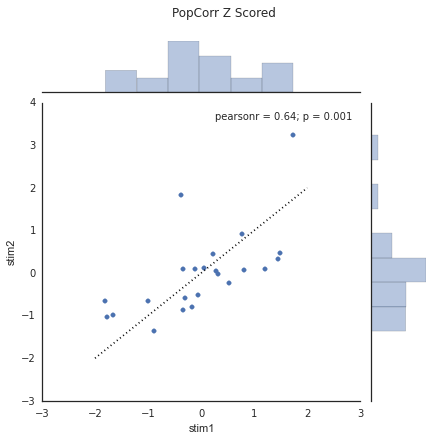

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import show
sns.set(style="white")


def plot_joint_graph(x1,x2,xlabel_str,ylabel_str,title_str):
    fig = sns.jointplot(x1, x2)
    x0, x1 = fig.ax_joint.get_xlim()
    y0, y1 = fig.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    fig.ax_joint.plot(lims, lims, ':k')    

    fig.set_axis_labels(xlabel_str, ylabel_str)
    plt.subplots_adjust(top=0.9)
    fig.fig.suptitle(title_str) # can also get the figure from plt.gcf()
    show()
    return
    
plot_joint_graph(pc_zscored_stim1,pc_zscored_stim2,'stim1','stim2','PopCorr Z Scored')


Now plot the points compared to each other

cobra_analysis.py:170: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 636820 but corresponding boolean dimension is 5000
  activity_matrix[:, i] = gaussian_filter_psth(spike_times_all[indices], t_start, t_end,


20000
23


cobra_analysis.py:170: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 758202 but corresponding boolean dimension is 5000
  activity_matrix[:, i] = gaussian_filter_psth(spike_times_all[indices], t_start, t_end,


20000
23


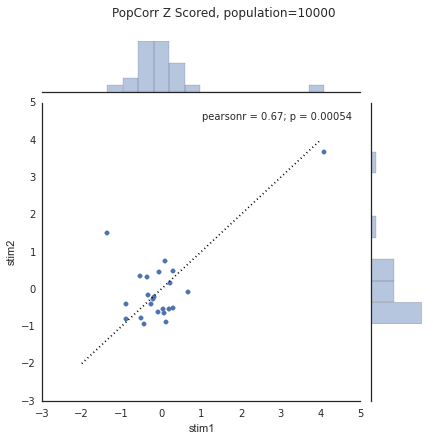

In [13]:
#now run the analysis on spikes, where now the pouplation average is based on all the 10000 
#cells. Not sure if this is a meaningful or useful analysis...

#stim 1
pc_zscored_stim1 = cobra_analysis.pop_corr_spikes_z_scored_all(spiketimes1_all,spiketimes1, indices_cont1, len(np.unique(indices_cont1)), t_start=0, t_end=20000)


#stim 2
pc_zscored_stim2 = cobra_analysis.pop_corr_spikes_z_scored_all(spiketimes2_all,spiketimes2, indices_cont2, len(np.unique(indices_cont2)), t_start=0, t_end=20000)

# now plot
plot_joint_graph(pc_zscored_stim1,pc_zscored_stim2,'stim1','stim2','PopCorr Z Scored, population=10000')
